# Step1) Prob map (픽셀별로 머리일 확률 도출) 만드는 첫번째 분류기 만들기

In [3]:
import numpy as np
from PIL import Image
import glob
import os 
# LOAD FILES AND MAKE IT AS NUMPY FILE
os.chdir('C:\\Users\korea\Desktop\keras(2018.11.12)프로젝트 자료\\texture')
dir_path= 'C:/Users/이보근/Desktop/빅데이터연구회/2학기 딥러닝 1조/프로젝트 자료/texture/Patch1k/Patch1k'
path = [dir_path + '/Hair/Training',
        dir_path + '/Hair/Testing',
        dir_path + '/NonHair/Training',
        dir_path + '/NonHair/Testing'
       ]
size = (35, 35)
filelist = glob.glob(path[0] + '/*.jpg')
for img_path in filelist: # 이미지 사이즈 바꾸기
    img = Image.open(img_path)
    img.resize(size).save(img_path)
x_train_hair = np.array([np.array(Image.open(fname)) for fname in filelist])

filelist = glob.glob(path[1] + '/*.jpg')
for img_path in filelist: # 이미지 사이즈 바꾸기
    img = Image.open(img_path)
    img.resize(size).save(img_path)
x_test_hair = np.array([np.array(Image.open(fname)) for fname in filelist])

filelist = glob.glob(path[2] + '/*.jpg')
for img_path in filelist: # 이미지 사이즈 바꾸기
    img = Image.open(img_path)
    img.resize(size).save(img_path)
x_train_non = np.array([np.array(Image.open(fname)) for fname in filelist])

filelist = glob.glob(path[3] + '/*.jpg')
for img_path in filelist: # 이미지 사이즈 바꾸기
    img = Image.open(img_path)
    img.resize(size).save(img_path)
x_test_non = np.array([np.array(Image.open(fname)) for fname in filelist])

x_train = np.concatenate((x_train_hair, x_train_non), axis=0)
x_test = np.concatenate((x_test_hair, x_test_non), axis=0)

y_train_hair = np.ones(840)
y_test_hair = np.ones(210)
y_train_non = np.zeros(840)
y_test_non = np.zeros(210)

y_train = np.append(y_train_hair, y_train_non)
y_test = np.append(y_test_hair, y_test_non)

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1680, 35, 35, 3)
(420, 35, 35, 3)
(1680,)
(420,)


In [2]:
# LOAD PACKAGES
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils

# CONSTANTS
img_rows, img_cols = 35, 35
batch_size = 64
epochs = 10
num_classes = 2
input_shape = (img_rows, img_cols, 3)
print('* Check input_shape : ', input_shape)

# TO SHUFFLE THE DATA (NOT NECESSARY)
number_datapoints = x_train.shape[0]
index = np.arange(number_datapoints)
np.random.seed(0)
np.random.shuffle(index)
x_train_shuffle = x_train[index]
y_train_shuffle = y_train[index]

Using TensorFlow backend.


* Check input_shape :  (35, 35, 3)


In [4]:
# ONE HOT VECTOR ENCODING
y_train_shuffle = keras.utils.to_categorical(y_train_shuffle, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("* y_train data shape : ", y_train_shuffle.shape)
print("* y_test data shape : ", y_test.shape)

* y_train data shape :  (1680, 2)
* y_test data shape :  (420, 2)


In [5]:
import numpy as np
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = ResNet50(weights='imagenet', include_top=False, input_shape=(35,35,3))
 #(3) Create a sequential model
new_model = Sequential()
new_model.add(model)
new_model.add(Flatten())
new_model.add(Dense(num_classes))
new_model.add(Activation('softmax'))

new_model.summary()

C:\anaconda\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2, 2, 2048)        23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 16386     
_________________________________________________________________
activation_50 (Activation)   (None, 2)                 0         
Total params: 23,604,098
Trainable params: 23,550,978
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='acc', verbose=1)
 #MAKING CHECKPOINT
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

#hist = model.fit(x_train, y_train,
#                 epochs=5,
#                 batch_size=100,
#                 shuffle=True,
#                 validation_data=(x_test, y_test),
#                 callbacks = [early_stopping, checkpoint]
#                 )

new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = new_model.fit(x_train_shuffle, y_train_shuffle,
                 epochs=20,
                 batch_size=64,
                 validation_data=(x_test, y_test),
                 callbacks = [checkpoint]
                 )

Train on 1680 samples, validate on 420 samples
Epoch 1/20
1680/1680 [==============================] - 296s 176ms/step - loss: 0.5162 - acc: 0.8637 - val_loss: 0.4573 - val_acc: 0.9286

Epoch 00001: val_acc improved from -inf to 0.92857, saving model to weights-improvement-01-0.93.hdf5
Epoch 2/20
1680/1680 [==============================] - 299s 178ms/step - loss: 0.2026 - acc: 0.9399 - val_loss: 0.3849 - val_acc: 0.9095

Epoch 00002: val_acc did not improve from 0.92857
Epoch 3/20
1680/1680 [==============================] - 292s 174ms/step - loss: 0.1581 - acc: 0.9494 - val_loss: 0.1734 - val_acc: 0.9452

Epoch 00003: val_acc improved from 0.92857 to 0.94524, saving model to weights-improvement-03-0.95.hdf5
Epoch 4/20
1680/1680 [==============================] - 285s 170ms/step - loss: 0.1046 - acc: 0.9583 - val_loss: 0.1814 - val_acc: 0.9452

Epoch 00004: val_acc did not improve from 0.94524
Epoch 5/20
1680/1680 [==============================] - 283s 168ms/step - loss: 0.0619 - acc

In [9]:
import os 
os.chdir('C:\\Users\korea\Desktop\keras(2018.11.12)/')

In [10]:
# SAVE AND LOAD MODEL (FOR CODING)
from keras.models import load_model
filename = 'Densnet201-0.9571.hdf5'
#new_model.save(filename)
new_model = load_model(filename)

OSError: Unable to open file (unable to open file: name = 'Densnet201-0.9571.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Step2) 머리 염색하기 (앞의 분류기에 Texture data 적용해서 Prob map 도출)

In [12]:
import numpy as np
import keras
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import load_model
import os
os.chdir('C:\\Users\korea\Desktop\keras(2018.11.12)')
filename = 'Densenet201-0.9571.hdf5'
new_model = load_model(filename)

In [54]:
import numpy as np
from PIL import Image
import math

img_path = 'C:\\Users\korea\Desktop\keras(2018.11.12)/Figaro1k/Original/Training'
img = Image.open(img_path + '/Frame00042-org.jpg')
img = img.resize((400, 500)) #원래 image는 400 by 500로 resize
img2 = np.array(img) # np.array로 바꾸면 500 by 400으로 dimension 바뀜 
img2.shape #500,400, rgb=3

(500, 400, 3)

In [55]:
height = img2.shape[0] #행 수 500
weight = img2.shape[1] #열 수 400
prob_map_raw = np.zeros((height, weight))

In [56]:
prob_map_raw.shape

(500, 400)

In [57]:
height

500

In [58]:
# Patch마다 Probability mab 지정
#prob_map = np.zeros((b,a))
#data = np.zeros((b*a,35,35,3))

#height=500, weight=400만큼 훑는데, 35 by 35 classifier이고, step_size(stride)=1- 겹치는 픽셀값은 평균 냄
k = 0
for i in range(height-35): #height-step_size
    for j in range(weight-35): #weight-step_size
        img3 = img2[i:i+35, j:j+35]
        #data[k] = img3
        k = k+1
        img3 = img3.reshape(1,35,35,3)
        prob_map_raw[i:i+35,j:j+35] = prob_map_raw[i:i+35,j:j+35] + new_model.predict(img3)[0,1] #prob_map+ sum(prob(hair))#0부터 35까지 같은 probabilty 주는것 맞나? 그 사이즈만큼 판별하는거니까
        if k%5000==0: print(k)        

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000


In [59]:
#i,j 픽셀마다, 35 by 35, probabilty 겹친 횟수만큼 나눠줌 (proba-sum 했다가 평균냄 ), 최종적으로 prob_map 500,400 나오는것?
for i in range(height):
    for j in range(weight):
        if i < 34 and j < 34: 
            prob_map_raw[i,j] = prob_map_raw[i,j]/((i+1)*(j+1))
        elif i < 34 and j >= 34 and j <= (weight-34): 
            prob_map_raw[i,j] = prob_map_raw[i,j]/((i+1)*35)
        elif i < 34 and j > (weight-34): 
            prob_map_raw[i,j] = prob_map_raw[i,j]/((i+1)*(weight-j+1))
        elif i >= 34 and i <= (height-34) and j < 34 :
            prob_map_raw[i,j] = prob_map_raw[i,j]/(35*(j+1))
        elif i >= 34 and i <= (height-34) and j >= 34 and j <= (weight-34):
            prob_map_raw[i,j] = prob_map_raw[i,j]/(35*35)
        elif i >= 34 and i <= (height-34) and j > (weight-34):
            prob_map_raw[i,j] = prob_map_raw[i,j]/(35*(weight-j+1))
        elif i > (height-34) and j < 34:     
            prob_map_raw[i,j] = prob_map_raw[i,j]/((height-i+1)*(j+1))
        elif i > (height-34) and j >= 34 and j <= (weight-34):
            prob_map_raw[i,j] = prob_map_raw[i,j]/((height-i+1)*35)
        elif i > (height-34) and j > (weight-34):
            prob_map_raw[i,j] = prob_map_raw[i,j]/((height-i+1)*(weight-j+1))
np.save('prob_map', prob_map_raw)   

(500, 400)


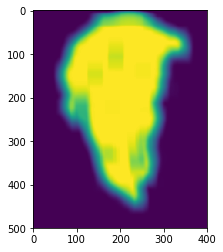

In [60]:
import matplotlib.pyplot as plt
#prob_map = prob_map.reshape(b,a)
print(prob_map_raw.shape)
plt.imshow(prob_map_raw) 

In [61]:
for i in range(height):
    for j in range(weight):
        img2[i,j] = np.round(img2[i,j]*prob_map_raw[i,j])

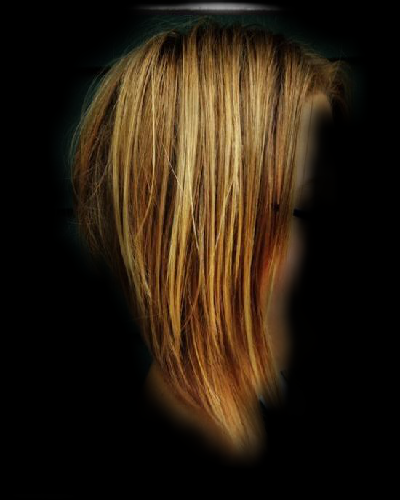

In [67]:
img3

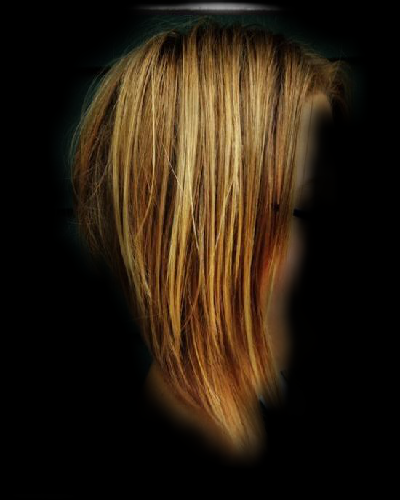

In [62]:
import numpy as np
import PIL
 
# Convert array to Image
img3 = PIL.Image.fromarray(img2)
img3

In [68]:
import numpy as np
from PIL import Image
import math

img_path = 'C:\\Users\korea\Desktop\keras(2018.11.12)\Figaro1k\Original\Training'
img = Image.open(img_path + '/Frame00042-org.jpg')
img = img.resize((400, 500))#

prob_map_raw = np.load('prob_map.npy')

img_origin = np.array(img) #image origin은 그대로 있고
img_dye = np.array(img)
img_final = np.zeros((500,400,3))#

height = img_origin.shape[0] #500
weight = img_origin.shape[1] #400
#np.array 500 by 400, 

#np.array 500 by 400 같은 dimension에 원하는 rgb 배율 주기(염색용)
for i in range(height):
    for j in range(weight):
        img_dye[i,j,0] = 0.6*img_dye[i,j,0]
        img_dye[i,j,1] = 0*img_dye[i,j,1]
        img_dye[i,j,2] = 0*img_dye[i,j,2]

prob = np.repeat(prob_map_raw, 3).reshape((500,400,3)) #probability map, rgb 각각에 똑같은 확률로 주기

In [76]:
prob

array([[[1.12716734e-04, 1.12716734e-04, 1.12716734e-04],
        [9.53266463e-05, 9.53266463e-05, 9.53266463e-05],
        [8.59580226e-05, 8.59580226e-05, 8.59580226e-05],
        ...,
        [1.13944338e-05, 1.13944338e-05, 1.13944338e-05],
        [6.44789907e-06, 6.44789907e-06, 6.44789907e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[9.80766599e-05, 9.80766599e-05, 9.80766599e-05],
        [8.01956867e-05, 8.01956867e-05, 8.01956867e-05],
        [7.12415258e-05, 7.12415258e-05, 7.12415258e-05],
        ...,
        [1.13819758e-05, 1.13819758e-05, 1.13819758e-05],
        [6.98259889e-06, 6.98259889e-06, 6.98259889e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[9.69579099e-05, 9.69579099e-05, 9.69579099e-05],
        [7.89062463e-05, 7.89062463e-05, 7.89062463e-05],
        [6.94421348e-05, 6.94421348e-05, 6.94421348e-05],
        ...,
        [1.03145078e-05, 1.03145078e-05, 1.03145078e-05],
        [6.22647824e-06, 6.22

In [74]:
img_origin.shape

(500, 400, 3)

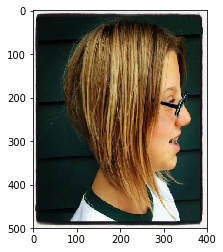

In [72]:
 plt.imshow(img_origin) #original picture

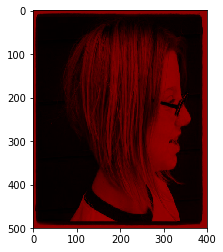

In [73]:
 plt.imshow(img_dye) #crimson-dyed picture

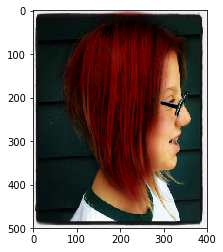

In [69]:
# origin 과 dye의 weighted sum
img_final = img_origin*(1-prob) + img_dye*prob
img_final = img_final.astype(int)
plt.imshow(img_final)

In [47]:
# 방법 1 : 각 사진의 영향력을 더 확실하게 해준다.
w = 1-prob**2

In [48]:
# 방법 2 : LBP개념 사용
w_k = np.array([[1,1,1],
               [1,0,1],
               [1,1,1]])/9
prob_mab_lbp = signal.convolve2d(prob_map_raw, w_k, 'same')

NameError: name 'signal' is not defined

In [ ]:
# 함수 짜기 - 직접 해보기, rgb 비율 - 원하는 색깔 딱 지정해서 바로 나오게끔, def or class 이용
염색(원본이미지, prob_map, r비율, g비율, b비율)